In [34]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score

from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Flatten
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout

(train_features, train_targets), (test_features, test_targets) = mnist.load_data()

train_features = train_features.reshape(60000, 784)
print('size of the training dataset:', train_features.shape)
test_features = test_features.reshape(10000, 784)
print('size of the testing dataset:', test_features.shape)

size of the training dataset: (60000, 784)
size of the testing dataset: (10000, 784)


In [4]:
#Normalising the input data
train_features = train_features / 255.0
test_features = test_features / 255.0

train_x = train_features
train_y = train_targets

test_x = test_features
test_y = test_targets

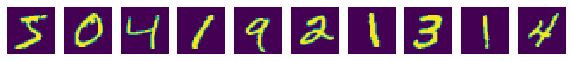

Corresponding labels for the images: [5 0 4 1 9 2 1 3 1 4]


In [9]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_x[i].reshape(28, 28))
    plt.axis('off')
plt.show()
print('Corresponding labels for the images: %s' % (train_y[0:10]))

In [22]:
print('Before conversion:', train_y[:5])

y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

print('\nAfter conversion:\n', y_test[:5])

Before conversion: [5 0 4 1 9]

After conversion:
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [56]:
accuracy_df = pd.DataFrame([], columns = [['train_score', 'test_score', 'test_F1_score']])

#### Model1: A simple neural network with sigmoid in hidden layers.

In [57]:
model = Sequential()

model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_x, y_train, validation_data = (test_x, y_test), batch_size = 256, epochs = 30, verbose = 0)

predict_y = model.predict(test_x)
predict_value = predict_y.argmax(axis=1)
actual_value = y_test.argmax(axis=1)

In [58]:
accuracy_df.loc['simple_sigmoid', 'train_score'] = model.evaluate(train_x, y_train, verbose=0)[1]
accuracy_df.loc['simple_sigmoid', 'test_score'] = model.evaluate(test_x, y_test, verbose=0)[1]
accuracy_df.loc['simple_sigmoid', 'test_F1_score'] = f1_score(actual_value, predict_value, average='weighted')

#### Model2: Enhancement done to weight initialization technique

In [59]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [62]:
model = mlp_model()

model.fit(train_x, y_train, validation_data = (test_x, y_test), batch_size = 256, epochs = 30, verbose = 0)

predict_y = model.predict(test_x)
predict_value = predict_y.argmax(axis=1)
actual_value = y_test.argmax(axis=1)

accuracy_df.loc['sigmoid_weight_imp', 'train_score'] = model.evaluate(train_x, y_train, verbose=0)[1]
accuracy_df.loc['sigmoid_weight_imp', 'test_score'] = model.evaluate(test_x, y_test, verbose=0)[1]
accuracy_df.loc['sigmoid_weight_imp', 'test_F1_score'] = f1_score(actual_value, predict_value, average='weighted')

In [61]:
accuracy_df

,train_score,test_score,test_F1_score
simple_sigmoid,0.112367,0.1135,0.0231383
sigmoid_weight_imp,0.112367,0.1135,0.0231383


#### Model3 => using Non linear function ReLU.
Since sigmoid and tanh suffer from vanishing gradient problem where there is no learning at higher positive and negative side

In [70]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [71]:
model = mlp_model()

model.fit(train_x, y_train, validation_data = (test_x, y_test), batch_size = 256, epochs = 30, verbose = 0)

predict_y = model.predict(test_x)
predict_value = predict_y.argmax(axis=1)
actual_value = y_test.argmax(axis=1)

accuracy_df.loc['simple_ReLU', 'train_score'] = model.evaluate(train_x, y_train, verbose=0)[1]
accuracy_df.loc['simple_ReLU', 'test_score'] = model.evaluate(test_x, y_test, verbose=0)[1]
accuracy_df.loc['simple_ReLU', 'test_F1_score'] = f1_score(actual_value, predict_value, average='weighted')

In [72]:
accuracy_df

,train_score,test_score,test_F1_score
simple_sigmoid,0.112367,0.1135,0.0231383
sigmoid_weight_imp,0.112367,0.1135,0.0231383
simple_ReLU,0.909467,0.9126,0.91234


#### Model4 => using Non linear function ReLU with batch normalization and adam optimizer

In [74]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(200, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu')) 
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(200, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))          
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [75]:
model = mlp_model()

model.fit(train_x, y_train, validation_data = (test_x, y_test), batch_size = 256, epochs = 30, verbose = 0)

predict_y = model.predict(test_x)
predict_value = predict_y.argmax(axis=1)
actual_value = y_test.argmax(axis=1)

accuracy_df.loc['ReLU_Adam_norm', 'train_score'] = model.evaluate(train_x, y_train, verbose=0)[1]
accuracy_df.loc['ReLU_Adam_norm', 'test_score'] = model.evaluate(test_x, y_test, verbose=0)[1]
accuracy_df.loc['ReLU_Adam_norm', 'test_F1_score'] = f1_score(actual_value, predict_value, average='weighted')

In [76]:
accuracy_df

,train_score,test_score,test_F1_score
simple_sigmoid,0.112367,0.1135,0.0231383
sigmoid_weight_imp,0.112367,0.1135,0.0231383
simple_ReLU,0.909467,0.9126,0.91234
ReLU_Adam_norm,0.994017,0.9753,0.975293
